# APS1070 Week 3 Lecture Code

# Data Exploration

It is strongly suggested that you follow along and run your own code during the lecture. By the end of this lecture, you should be able to:

1. Setup and use Google Colab.
2. Be able to perform basic operations using `NumPy`.
3. Be able to plot using `matplotlib`.
4. Be able to load, process, and visualize data.
5. Be able to perform basic operations using `pandas`
6. Be able to perform basic machine learning operations using `Scikit-learn`.

# Part 0 - Sample Problem
## Predicting Titanic Survivors

![alt text](http://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg)

## Problem Background
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In 1997, the story of the Titanic was brought to the big screen and it allowed us to relive the story of two passengers, Jack and Rose, members of  different social classes, who fall in love on the ill-fated passenger liner.  

Most of you probably were not born when the movie came out, so in case you have not seen it yet, I’m not going to spoil it. In this lab we are going to work with a Titanic dataset to determine what sort of people were likely to survive. In particular we would like to predict if Jack and Rose would have survived. Afterwards, those of you who have not seen the movie can go and watch it to see if our predictions match the Hollywood story.

## Define the Problem
Our objective is to **predict if Jack and Rose would have survived the Titanic tragedy**, based on what we know about them from the movie Titanic directed by James Cameron. 

From the movie we can assume the following about Jack and Rose:

* Jack: 3rd class, no siblings, male, 25 years old, no cabin, fare = 7, embarked from Southhampton  
* Rose: 1st class, no siblings, has spouse, 22 years old, cabin, fare = 50,  embarked from Southhampton

To achieve this objective we are provided with historical data obtained after the Titanic tragedy. The historical data is provided as a CSV file containing information on 891 passengers as summarized below:

<pre>
PASSENGER INFORMATION:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
</pre>

### Open Data using Spreadsheet Software

To start off let's open the file `train.csv` which you can find on Quercus. You can open the file with Excel or your preferred spreadsheet software.

# Part 1 - Loading and Accessing Datasets

First let's review comma separated value (CSV) files. CSV files are simple text-based files well-suited for organizing similar spreadsheet data. In the CSV format all values are separated by a comma or some unique character. Using the Python csv module we can load our dataset:

# Option 1 - Using wget


In [ ]:
!pip install wget
!wget "https://saref.github.io/teaching/APS1070/train.csv"

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=af182508df4bd0b268ae0fc245880d625c2b1c044acfada5c22991e96315de9d
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
--2021-11-09 20:52:02--  https://saref.github.io/teaching/APS1070/train.csv
Resolving saref.github.io (saref.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to saref.github.io (saref.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/csv]
Saving to: ‘train.csv’

train.csv           100%[===================>]  58.89K  --.-KB/s    in 0.001s  

2021-11-09 20:52:02 (98.1 MB/s) - ‘train.csv’ saved [60302/60302]



#Option 2 - Load dataset to Colab session storage

*   Save the dataset from https://saref.github.io/teaching/APS1070/train.csv to your computer local drive.

*   Click on the folder icon from the left menu.

*   Then, select the upload icon under "Files" and select the file you want to upload.

If the file appears in the left panel, it means it is uploaded to the session storage.

Then for loading a file from the session storage, you can use the following code.

# Option 3 - Using files.upload()
Requires enabled third-party cookies



In [ ]:
#from google.colab import files
#uploaded = files.upload()

Then for loading a file from the session storage, you can use the following code.

In [ ]:
import csv
with open('train.csv','r') as csvfile:
    data_reader = csv.reader(csvfile)

    raw_data = []
    for row in data_reader:
        raw_data.append(row)

Next we're going to look through our raw data to make sure it was loaded correctly

In [ ]:
# display the full dataset
print(raw_data)

In [ ]:
# display the first row (column titles) 
print(raw_data[0])

In [ ]:
# display first two samples
print(raw_data[1:3])

In [ ]:
# how would you display the last five samples?







In [ ]:
# how would you display the first five odd samples?







In [ ]:
# can you find the Master. Michel Navratil, Passenger ID 194?






We've managed to display passenger information using lists. **What if we want to display an entire column**, how might we do that?

* Loop through entire dataset and append to another list
* or take the transpose of the list

Seems like the transpose option is more efficient, let us see how we can implent it. Rather than writing the code from scratch we can first see if someone else has written this function already.

After a [quick google search](https://stackoverflow.com/questions/6473679/transpose-list-of-lists) we see a few options: code to transpose a nested list in a number of ways, or we can use a module called **NumPy**. The NumPy module has a lot more functionality than just computing a transpose. This added functionality may prove useful as we proceed with our design challenge.

### NumPy Module

Numpy provides support for working with multi-dimensional data such as our CSV file. In particular, it has a number of methods for efficient computation of linear algebra equations, provides capability for finding, extracting and/or changing information in multi-dimensional data, and allows for slicing of matrices simulataneously by column and row indices (i.e. using numpy in Python gives functionality similar to MATLAB).

We'll highlight some of these traits as we proceed with our data analysis.

To start we'll load our numpy module and convert our nested list into a numpy array

In [ ]:
import numpy as np
data_numpy = np.array(raw_data)

data_numpy now holds all of the Titanic data.

In [ ]:
# display numpy dataset
print(data_numpy)

Notice how the numpy 2-dimensional array is printed across multiple rows rather than a continuous row as we've seen previously with nested lists.

Since there are a large number of samples, we cannot display all of them at the same time. Instead we can verify the structure of the data by displaying some of the samples at a time. Before we can do that we first need to understand how the numpy comma slicing notation works.

### NumPy Slicing

Slicing in NumPy is done differently from what we've seen so far. To highlight the differences we will compare numpy indexing and slicing of 1-dimensional and 2-dimensional data and compare it to what we did for lists.

**1-dimensional data: Indexing and Slicing**

To index a list we use square brackets [], and to slice a list we would use a colon operator:

* list_variable[index]  
* list_variable[start:end:step]

The same can be done for numpy:

* numpy_variable[index]  
* numpy_variable[start:end:step]

In [ ]:
list_variable = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

#list indexing
print("list indexing: ", list_variable[2])

#list slicing
print("list slicing: ", list_variable[1:8:2])

In [ ]:
numpy_variable = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

#numpy array indexing
print("numpy indexing: ", numpy_variable[2])
#numpy array slicing
print("numpy slicing: ", numpy_variable[1:8:2])

**2-dimensional data: Indexing and Slicing**

To index a 2-dimensional list (nested list) we attach a second set of square brackets []\[\], however we are not able to slice a nested list by row and column simultaneously. 

* list_variable\[index1\]\[index2\]  
* list_variable\[start:end:step\]\[start:end:step\] -> does something completely different  

To index a 2-dimensional numpy array we use the **comma notation which is different from indexing nested lists** and allows us slice a numpy array simultaneously by column and row.

* numpy_variable[index1,index2]  
* numpy_variable[start:end:step, start:end:step]  



In [ ]:
list_variable = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]

# nested list indexing
print("2D list indexing: ", list_variable[2][0])

# nested list slicing
print("2D list slicing: ", list_variable[0:2][0]) # creates a list of the first two rows, then gets the first element

In [ ]:
numpy_variable = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]) #is there another way to assign list to numpy?

# 2-d numpy array indexing
print("2D numpy indexing: ", numpy_variable[2, 0])

# 2-d numpy array slicing
# get the first two entries in the first column
print("2D numpy slicing: ", numpy_variable[0:2, 0])

Now we can go about verifying the format of the data by displaying some of the samples at a time.

In [ ]:
# select first row
print(data_numpy[0,:])
print(data_numpy[0])

In [ ]:
# select first column
print(data_numpy[:,0])

In [ ]:
# select first five columns and rows
print(data_numpy[:5,:5])

For our purposes it is not necessary to transpose the matrix as numpy allows for slicing columns and rows simultaneously.  

If we did need to apply a transform, it can be done relatively easily using the numpy transpose methods as shown:

In [ ]:
print(data_numpy.transpose())

### NumPy to Obtain Indices

Finding indices of specific values or range of values can be done using the np.where() method. 

numpy.where(condition[, x, y])  
* Return elements, either from x or y, depending on condition.
* If only condition is given, return indices where condition is True.

Since we're only interested in obtaining indices, we'll only provide a single argument to the method which will return two arrays (of the same size) corresponding to the row and column indices where the condition is true. For example:

In [ ]:
numpy_data = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print('numpy_data:\n', numpy_data, '\n')

# obtain indicies with values > 7
indices = np.where(numpy_data > 7)

# display row and column indices
print('all indices:', indices, '\n')

# display row indices
print('row indices:', indices[0], '\n')

# display column indices
print('col indices:', indices[1], '\n')

Note that the (row,col) indices for entries that are greater than 7 are: (1,3), (2,0), (2,1), (2,2), (2,2), and (2,3).

Let's apply this now to find indices in our data.

In [ ]:
# obtain index of column with 'Sex' in the header
sex_index = np.where(data_numpy[0,:] == 'Sex')

# print indices
print(sex_index)
print(sex_index[0])

# print value at index found
print(data_numpy[0,sex_index[0]])

In [ ]:
data_numpy[0]

In [ ]:
# obtain the two indexes of the name of a specific passenger
indexes = np.where(data_numpy == 'Navratil, Master. Michel M')

# print indices
print(indexes)

In [ ]:
# Retrieving the name by index
# print value at index found
print(data_numpy[indexes])

In [ ]:
# get indices of all male passengers
ind_gender = 4
indices_male = np.where(data_numpy[1:,ind_gender] == 'male')
print(indices_male[0])

# display the number of male passengers
num_males = len(indices_male[0])
print(num_males)

# compute percentage of male passengers
num_passengers = len(data_numpy[1:,ind_gender])
percent = 100*num_males/num_passengers
print(round(percent,2), '% male passengers')

In [ ]:
# what is the percentage of female passengers?






**Find percentage of males and females who survived** 

To start we need to find the indices of the survivors, then we can move on to find the indices of the male and female passengers. 

Hmmm, which column was "Survived"?

In [ ]:
# obtain index of column with title 'Survived'
survived_index = np.where(data_numpy[0,:] == 'Survived')
print(survived_index[0])

In [ ]:
data_numpy[0]

To make it easier to search by field name, we can create a dictionary for easy indexing.

In [ ]:
# loop through field names and populate a dictionary with indices
fields = {}

# cycle through the first row which represents the fields
for i in range(len(data_numpy[0])):
    fields[data_numpy[0, i]] = i

print(fields)

Now we can use the dictionary to quickly obtain the index of the field we are interested in searching.

Let's find the percentage of male passengers that survived

In [ ]:
# get indices for male passengers
field1 = 'Sex'
field1_val = 'male'
male_indices = np.where(data_numpy[0:,fields[field1]] == field1_val)
male_indices = list(male_indices[0])

# get indices for surviving passengers
field2 = 'Survived'
survived_indices = np.where(data_numpy[0:,fields[field2]] == '1')
survived_indices = list(survived_indices[0])

In [ ]:
survived_indices

### Set Theory

Now that we have a list of indices of passengers who survived, and a separate list of indices for the ones who are males, how can we use that information to find the number of male survivors?

Hint: Review set theory

There are a couple ways we could do this. One option is to convert our lists of indices into sets and take advantage of the set intersection method/operator (i.e. &).

In [ ]:
# compute percentage of male passengers who survived
percent = 100*len(set(male_indices) & set(survived_indices))/len(male_indices)
print(round(percent,2), '% of', field1_val, 'passengers survived')

We could do the same thing to find the percentage of female passengers that survived or even to find the percentage of first class, female passengeres who survived. But doing this would seem like a lot of code for each combination of characteristics. Why not write a function that generalizes?

We are given some number characteristics (A, B, C) (e.g., A could be male, B could be first class, etc) and we want to find out the percentage of passengers with all of those characteristics who survived. The little algorithm we could write is:

- find ind_A (the indices with characteristic A), ind_B, and ind_C and intersect them to form ind_characteristics
- find ind_survived (the indices of all passengers who survived)
- the length of ind_survived intersected with ind_characteristics divided by the length of ind_survived gives the proportion of surivors

Since we want to be able to do this with any number of characteristics, let's put them in a list.


In [ ]:
def get_survival(characteristics):
    """Return the percentage of passengers with the (field, value) entries in 
       characteristics that survived.
       characteristics is a list of the form [(field, value), (field, value), ...]
    """
    indices = set()
    for i in range(len(characteristics)):
        # get search category
        field = characteristics[i][0]
        
        # get value to search for
        val = characteristics[i][1]
        
        # find the matching indices
        new_indices = set(list(np.where(data_numpy[0:,fields[field]] == val)[0]))
        
        # intersect
        if len(indices) == 0:
            indices = new_indices
        else:
            indices &= new_indices
            
    # find the indices of the survivors    
    indices_survived = set(list(np.where(data_numpy[0:,fields["Survived"]] == "1")[0]))
        
    return 100*len(indices_survived & indices)/len(indices)

percent = get_survival([("Sex", "male")])
print(round(percent,2), '% of passengers survived among those matching the given characteristics')

In [ ]:
percent = get_survival([("Sex", "male"),("Pclass","1")])
print(round(percent,2), '% of passengers survived among those matching the given characteristics')

Now we can easily do the same thing for other combinations.

In [ ]:
# find the percentage of female passengers who survived






How about we combine gender and class to see how many first class males survived compared to other classes. How could we do that?

In [ ]:
# find the percentage of  male class 1 passengers that survived





In [ ]:
# find the percentage of female class 1 passengers that survived








# Part 2 - Cleaning the Datasets

You may have noticed that when we loaded our data to NumPy all the values were converted into strings because **unlike lists NumPy arrays can hold only one data type at a time** (i.e. string or float, not both). This is somewhat problematic as we cannot plot strings, we need numerical values. We need to reformat our dataset before we can plot it. How might we do that?

### Replace strings values with numbers
Finding values in a  column is something we've done earlier, but what about finding and overwriting data? 

Turns out we can also select NumPy data by value using conditionals. For examples:
    
    x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

    x[x >= 5]
    
Will select only the data that is greater than or equal to 5 in a numpy array x.

We can take this further by assigning the data a particular value. 

    x[x >= 5] = 100

Will select only the data greater than or equal to 5 and change the value to 100. Note that normally this would create an error, however, NumPy knows to make the assumption that the many elements selected in the left-hand-side are to be replaced with a single value (i.e. 100) shown in the right-hand-side.

In [ ]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
print(x[x >= 5])
x[x >= 5] = 100
print(x)

**How do we convert strings into numerical values?**

In [ ]:
# select the gender of passengers
index = fields['Sex']
gender = data_numpy[1:, index]

# find male passengers and set them to 0
gender[gender == 'male'] = 0
print(gender)

# find female passengers and set them to 1
gender[gender == 'female'] = 1
print(gender)

In [ ]:
# convert all the strings into floats
gender = gender.astype(float)

# verify conversion to float
#print(gender)
print(data_numpy[:,fields['Sex']])

### Replace missing values with numbers

**How do we find and replace missing values?**

Missing values in our NumPy dataset are represented as blanks "". Just like in the previous example, we can select numpy data by value using conditionals and replace the values with a value of our choosing.

Another option is to convert the missing values (blanks) to nan (not a number) first and then decide later how to replace the nans with a value of our choosing.

In [ ]:
# update the age data to numerical values
index = fields['Age']
age = data_numpy[1:, index]

# find the ones that are empty and make them nan
age[age == ''] = np.nan

# convert all the strings into floats
age = age.astype(float)

# verify conversion to float
#print(age)
print(data_numpy[:,fields['Age']])

Then later we can find the nan values and replace them with a value of our choosing using the isnan method as shown:



    x[numpy.isnan(x) == 1] = chosen_value

In [ ]:
# Replacing all nan values for age with 0

age[np.isnan(age)] = 0
print(age)

In [ ]:
#How would you replace the missing age value with the average age value?





Now let's use that to fix our data to only hold numerical values. We can also put everything together into a class data structure. **Make sure that the trian.csv file is loaded.**

In [ ]:
# Helper Titanic_Data Class

# Correct values in Survival, Gender, Embarked, and Age columns
import csv
import numpy as np

class Titanic_Data:
    """Titanic data set"""
    
    def __init__(self, Filename):
        """load Titanic data set"""
        with open(Filename,'r') as csvfile:
            data_reader = csv.reader(csvfile)
            data_orig = []
            for row in data_reader:
                data_orig.append(row)
        
        # loop through field names and populate a dictionary with indices
        fields = {}
        for i in range(len(data_orig[0])):
            fields[data_orig[0][i]] = i
        
        # exclude the first row when preparing the numpy data structure
        self.data = np.array(data_orig[1:])
        self.fields = fields
    
    def get_survival(self, characteristics):
        """Return the percentage of passengers with the (field, value) entries in 
           characteristics that survived.
           characteristics is a list of the form [(field, value), (field, value), ...]
        """
        indices = set()
        for i in range(len(characteristics)):
            # obtain search category
            field = characteristics[i][0]
        
            # obtain value to search for
            val = characteristics[i][1]
        
            # find and intersect the matching indices
            new_indices = set(list(np.where(self.data[0:,self.fields[field]] == val)[0]))
        
            # intersect
            if len(indices) == 0:
                indices = new_indices
            else:
                indices &= new_indices
            
        # find the indices of the survivors    
        indices_survived = set(list(np.where(self.data[0:,self.fields["Survived"]] == "1")[0]))
        
        return 100*len(indices_survived & indices)/len(indices)    
   
    def clean_data(self):
        """Converts all data into numerical values 
        (missing data is converted into nan)"""
        self.clean('Sex', ['male', 'female'])
        self.clean('Embarked', ['C', 'Q', 'S'])
        self.clean('Age')
        self.clean('Pclass')
        self.clean('SibSp')
        self.clean('Parch')
        self.clean('Fare')
   
    def clean(self, col_header, values = []):
        """Converts column data into numerical values
        (missing data is convereted into nan)"""
        # select the column
        column = self.data[:,self.fields[col_header]]
        # find the ones that are empty and make them nan
        column[column == ''] = 0 #np.nan
        # encode the the strings as numbers
        for i in range(len(values)):
            column[column == values[i]] = i
        # overwrite
        self.data[:,self.fields[col_header]] = column
   
    def keep_columns(self, L):
        """Select Features """           
        feature_data = self.data[:,L]
        feature_data = feature_data.astype(float)
        return feature_data


In [ ]:
# call function to prepare data structure
titanic = Titanic_Data('train.csv')
print(titanic.data[0,:])

# cleaned data
titanic.clean_data()
print(titanic.data[0,:])

# remove unnecessary columns and convert array to float
feature_data = titanic.keep_columns([1, 2, 4, 5, 6, 7, 9, 11])
print(feature_data[0,:])

In [ ]:
# Features and target cleaned and converted into numeric values look like this:

feature_data

In [ ]:
# How do we quickly obtain the field names from the feature_data?







In [ ]:
# Rewrite the "keep_columns" method to take the field names as input?





# Part 3 - Visualizing Datasets

This part will focus on visualizing the data to find patterns that may allow us to make a prediction on who would survive the Titanic tragedy.

Python has many modules available dealing with visualization. One of the most popular to use is the **matplotlib module** which replicates the plotting capability of MATLAB. In what is to follow, we will discuss how to import and use this module.

To start we can use the plot() method, which takes an optional format string argument that specifies the color and style of the plotted line. For example, plot(x_values, y_values, 'r--') uses 'r' to specify a red color, and '--' to specify a dashed line. You can find more information on formatting options at the following [link](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot).


### Plotting with Pyplot

In [ ]:
import matplotlib.pyplot as plt

The program imports the pyplot module from the matplotlib package, **renaming matplotlib.pyplot to plt** using the **as** keyword. 

The plt.plot() function plots data onto the graph. plot() accepts various arguments. If provided just one list, as in plt.plot(val), plot() uses 0, 1, ... for x values, as in (0, val[0]), (1, val[1]), etc. 

plt.plot() on its own will not display anything. One needs to call the plt.show() function to displays the graph.

To start let's plot the survival percentages based on gender:

In [ ]:
# plot survival by gender
male_survived = 18.9 #get_survival([("Sex", "male")])   #18.9
female_survived = 74.2 #get_survival([("Sex", "male")]) #74.2
survived_percent = [male_survived, female_survived]

# plot survival percentages
plt.plot(survived_percent)
plt.show()

In [ ]:
# plot survival without connecting lines
plt.plot(survived_percent, 'mo')
plt.show()

In [ ]:
# add tick labels
plt.plot(survived_percent, 'mo')
plt.xticks([0, 1],['males', 'females'])
plt.show()

Calling plot multiple times draws items (dots or lines) in the figure.

In [ ]:
# we can plot percentages of those that survived with overlapping percentages 
# of those that did not survive
survived_percent = [male_survived, female_survived]
not_survived_percent = [100 - male_survived, 100 - female_survived]

plt.plot(survived_percent, 'm--o')
plt.plot(not_survived_percent, 'r-.D')
plt.xticks([0, 1],['males', 'females'])


plt.show()

### Text and Annotations

In [ ]:
# add title and axis labels
plt.plot(survived_percent, 'mo')
plt.title('Titanic Survivals by Gender')
plt.ylabel('Percentage of survival')
plt.xlabel('Gender')
plt.xticks([0, 1],['males', 'females'])
plt.show()

Hmmmm, this information would be best represented as a bar graph. Turns out we can do that as well using matlibplot.

### Bar Graphs - Averaged Data
We can visualize the survival rates using bar graphs as shown:

In [ ]:
# plot bar graph of survival by gender
pos = [0, 1]
plt.bar(pos, survived_percent, align = 'center')
plt.xticks(pos,['males survived', 'females survived'])
plt.title('Survival Percentage Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

In [ ]:
# plot bar graph of survival by class
male_class_survived = [36.88, 15.74, 13.54]


# x axis position of bars graph
pos = range(len(male_class_survived))
# generate bar graph
plt.bar(pos, male_class_survived, align = 'center')
# provide labels for each bar based on provided positions
plt.xticks(pos,['1st', '2nd', '3rd'])
plt.title('Survival Percentage of Males Based on Class')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.show()

### Subplot
We can also use subplots to plot everything together. In your spare time see if you can plot the percentage of male and female survivors using subplots.

In [ ]:
# Use subplots to show male and female survivors by class










What if we wanted to plot an entire column? For example, we could plot the ages of all the passengers.

In [ ]:
# plot age
plt.plot(age)
plt.title('Passenger Age')
plt.xlabel('Passenger #')
plt.ylabel('Age (years)')
plt.show()

By making the missing data of type nan (not a number), plot will ignore those values when plotting age values.

### Histogram
Since we don't care about the sequence of the age of passengers, it may be more informative to see how many passengers we have within each age group, i.e. plot a histogram of our data.

In [ ]:
plt.hist(age, bins=30)
plt.title('Passenger Age Histogram')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

In [ ]:
# plot a histogram of passenger ages excluding nan values which we replaced with 0
# to plot the histogram we need to exclude the missing ages, i.e. 0 values

# the np.isnan() method returns True for values that are of type nan
# age[np.isnan(age) == 0]
plt.hist(age[age > 0], bins=3)
plt.title('Passenger Age Histogram')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

In [ ]:
age

**(Optional) As another exploration activity, it might be useful to see how survival changes with age. To do that it might be helpful to plot the survivor and non-survivor age histograms overtop of each other. Hmmm, how might we do that?** [(Hint)](http://stackoverflow.com/questions/6871201/plot-two-histograms-at-the-same-time-with-matplotlib)

In [ ]:
# Plot a histogram of passenger ages excluding nan values and overlap survivors and non-survivors. Does this provide any insight into the data?








In [ ]:
 data_numpy[0,[1,2,4,5,6,7,9,11]]

### Scatterplot
Another great visualization tool is the scatterplot. The scatterplot would allow us to compare survivors and nonsurvivors using two columns at a time.

In [ ]:
#field names
field_names = data_numpy[0,[1,2,4,5,6,7,9,11]]

#Scatterplot
selected_features = feature_data[:,1:]
selected_labels = feature_data[:,0]

feature_name = field_names[1:]
print(feature_name)

x_index = 0
y_index = 1

plt.figure(figsize=(5, 3))
plt.scatter(selected_features[:,x_index], selected_features[:,y_index], c= selected_labels)
plt.colorbar(ticks=[0, 1, 2])
plt.xlabel(feature_name[x_index])
plt.ylabel(feature_name[y_index])
plt.yticks([0, 1],['males', 'females'])
plt.xticks([1, 2, 3])

plt.tight_layout()
plt.show()

# Part 4 - Pandas Library
Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. It is well suited for handling tabular data.

### Load a Dataframe
To start we're going to load our Titanic data into a pandas data frame. There are two options.

In [ ]:
# Option 1: Loading directly from the URL (no upload/wget needed)
import pandas as pd
data_pandas = pd.read_csv('https://saref.github.io/teaching/APS1070/train.csv')

In [ ]:
# Option 2: Download, upload, then load
# Upload train.csv to Google Colab
from google.colab import files
uploaded = files.upload()

In [ ]:
# Load as a pandas dataframe
import pandas as pd
data_pandas = pd.read_csv('train.csv')

call methods head() and tail() to view the beginning and end of our data frame.

In [ ]:
#view first 5 samples
data_pandas.head()

In [ ]:
#view last 5 samples
data_pandas.tail()

attributes columns and dtypes will show the colums and data types for each of the columns

In [ ]:
#view column indices
data_pandas.columns

In [ ]:
#view data types for each column
data_pandas.dtypes

call method info() to obtain information on missing data

In [ ]:
#obtain more information
data_pandas.info()

Note that **object refers to string data types**. From the information provided we can see that we have 5 columns that are string values, three columns have missing information, with little information on Cabin location.

method describe() provides **Summary Statistics:** count, mean, min, max, etc.

In [ ]:
#provide summary statistics for each column
data_pandas.describe()

Statistics only shown for numerical data. We need to fill in the missing values for other columns in order to show them.

Slicing or retrieving data in a pandas data frame shares many similarities with NumPy.

In [ ]:
# slicing or selection by columns
data_pandas[{'PassengerId','Sex','Name'}]

In [ ]:
# slicing or selection by rows
data_pandas[{'PassengerId','Sex','Name'}][10:20]

Search for passengers using conditional operators

In [ ]:
# select passengers under 1 years of age
data_pandas[{'PassengerId','Sex','Name', 'Age'}][data_pandas['Age'] < 1]

In [ ]:
# select female passengers under 1 year of age
data_pandas[(data_pandas['Sex']== 'female') & (data_pandas['Age'] <1)]

In [ ]:
# select female passengers under 20 year of age in class 1
data_pandas[(data_pandas['Sex'] == 'female') & (data_pandas['Age'] <15) & (data_pandas['Pclass'] == 1)]

In [ ]:
# sort passengers by age
data_pandas.sort_values(by = 'Age', ascending=[True])


In [ ]:
# sort passengers by age and gender - replace requires overwrite
data_pandas1 = data_pandas.sort_values(by = ['Pclass', 'Age'], ascending=[True, False])
data_pandas1

Saving sorted dataframe back to a csv file

In [ ]:
# save file quick
data_pandas1.to_csv('train_sorted.csv') 

Replace missing with zero values

In [ ]:
# remove missing requires overwrite
data_pandas2 = data_pandas.fillna(0)
data_pandas2

In [ ]:
# verify missing removed
data_pandas2.info() 

Replace strings with numbers

In [ ]:
mapping = {'male': 0, 'female': 1} #dictionary
data_pandas3 = data_pandas2.replace({'Sex': mapping})
data_pandas3

In [ ]:
# replace embarked with numbers
mapping = {'0': 0, 'C': 1, 'S': 2, 'Q': 3} #dictionary
data_pandas4 = data_pandas3.replace({'Embarked': mapping})
data_pandas4

In [ ]:
# verify strings updated to int
data_pandas4.info() 

Drop columns we don't intend to use

In [ ]:
data_pandas5 = data_pandas4.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
data_pandas5

In [ ]:
# verify one last time
data_pandas5.info() 

Data visualization with pandas works the same way as with NumPy

In [ ]:
# survival by family size
import matplotlib.pyplot as plt

data_pandas6 = data_pandas5
data_pandas6['FamilySize'] = data_pandas5['SibSp'] + data_pandas5['Parch']

data_pandas6['FamilySize'].hist()
plt.ylabel('Number of passengers')
plt.xlabel('Family size')

# Part 5 - Making Predictions

After visualizing the data in the previous part, we can see that the odds of surviving vary depending on passenger information such as: age, sex, class. Is there some way we can use all our passenger information to predict survival?

In this part we will take a look at how to use the readily available machine learning algorithms into make predictions on survival.

The machine learning community has grown substantially over the years and there are many modules available to implement the different algorithms. To implement the algorithms, all we need to do is obtain a dataset and arrange it to follow the machine learning conventions.


### Splitting Data
Divide data into a training and validation dataset

In [ ]:
#first convert pandas to numpy
data_processed = data_pandas5.values
print(data_processed.shape)

# obtain columns
columns = data_pandas5.columns.values
print('columns =', columns)

In [ ]:
data_processed

In [ ]:
#splitting data
from sklearn.model_selection import train_test_split

train_data,val_data,train_labels,val_labels = train_test_split(data_processed[:,1:],data_processed[:,0],test_size=0.2)

#verify shape of data
print(train_data.shape, train_labels.shape)
print(val_data.shape, val_labels.shape)

In [ ]:
# verify the training data and labels are correct
print(train_data)
print(train_labels)

### Scikit-Learn for Machine Learning
There are many machine learning algorithms developed for making predictions (classification) similar to the one we are trying to do in our problem. To use these algorithms we first need to import them from the scikit-learn machine learning modules for Python. More information on the different algorithms can be found at the following [link](http://scikit-learn.org/stable/).

There are many machine algorithms to choose from such as:

1. Decision Trees
2. K-Nearest Neighbours
3. Random Forests
4. Support Vector Machines

For now let us focus on the decision trees classifier. We import the classifier and setup some default parameters.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5)

### Train Machine Learning Algorithm
Next we train our algorithm on the training set. This updates the model parameters to make predictions specific to our data.

In [ ]:
model.fit(train_data, train_labels)

Now compare the prediction on the training_data and val_data to get a sense of prediction performance.

In [ ]:
# predict the first 10 training samples and compare to the actual survival outcomes
print('Training Sample Labels:     ', train_labels[0:10])
sample_predict = model.predict(train_data[0:10,:])
print('Predicted Survival Outcome: ', sample_predict)

Seems like the prediction worked well on the training samples. How about the validation samples.

In [ ]:
# assess on the first 10 validation samples and compare to the actual survival outcomes
print('Validation Sample Labels:   ', val_labels[0:10])
sample_predict = model.predict(val_data[0:10,:])
print('Predicted Survival Outcome: ', sample_predict)

Already we see that some of the predictions were not correct.

### Evaluate Performance
The accuracy of a model is obtained by computing the percentage of correctly predicted survival outcomes over all passengers.
To get a better idea of performance we need to assess our model on a larger set of data. Let's predict the outcome on all of the validation data and compute a percentage of how many survival outcomes were correctly predicted.

In [ ]:
# obtain survival predictions on all testing data
val_predicted = model.predict(val_data)

# obtain a percentage score of performance on all testing data
score = 100*(1-sum(abs(val_predicted-val_labels))/len(val_predicted))
print('Validation data performance', score, '% correctly predicted')

How does that compare with the samples obtained from the training data?

In [ ]:
# obtain survival predictions on all training data
train_predicted = model.predict(train_data)

# obtain a percentage score of performance on all training data
score = 100*(1-sum(abs(train_predicted-train_labels))/len(train_predicted))
print('Training data performance', score, '% correctly predicted')

The prediction achieved better performance on the training data than the testing data. This makes sense because the machine learning algorithms are trying to model the training data not the validation data.  

Let's see if we can get better performance by adjusting the training parameters (i.e. max_depth) and applying other machine learning algorithms.

### Compare Machine Learning Algorithms 

As a final step we will adjust our training parameters and machine learning algorithms to see if we can do any better on the survival prediction performance.


Test **K-Nearest Neighbours** Algorithm

In [ ]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

# Fit the model to our training data
model.fit(train_data, train_labels)

# Make predictions
val_predicted = model.predict(val_data)
score = 100*(1-sum(abs(val_predicted-val_labels))/len(val_predicted))
print("KNN Test:", score)

We’ve just implemented a high level prediction in only a couple lines. Since each dataset is different, we may find that there are other algorithms that are better suited for this prediction. Let’s examine some of the other popular machine learning algorithms.

Test **Decision Tree** Learning Algorithm

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=15)

# Fit the model to our training data
model.fit(train_data, train_labels)

# Make predictions
val_predicted = model.predict(val_data)
score = 100*(1-sum(abs(val_predicted-val_labels))/len(val_predicted))
print("DT Test:", score)

Test **Random Forest** Learning Algorithm

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=250)

# Fit the model to our training data
model.fit(train_data, train_labels)

# Make predictions
val_predicted = model.predict(val_data)
score = 100*(1-sum(abs(val_predicted-val_labels))/len(val_predicted))
print("RF Test:", score)

Test **Support Vector Machine** Learning Algorithm

In [ ]:
# Support Vector Machines
from sklearn import svm
model = svm.SVC(gamma=2, C=1)

# Fit the model to our training data
model.fit(train_data, train_labels)

# Make predictions
val_predicted = model.predict(val_data)
score = 100*(1-sum(abs(val_predicted-val_labels))/len(val_predicted))
print("SVM Test:", score)

These are just a few of the available machine learning algorithms at our disposal. Designing these algorithms would have taken hours of work, fortunately, the Python open source community is strong and many people out there are willing to contribute. Hence, for an off-the-shelf application, all we have to do is change one or two lines in our code to evaluate.

## Final Testing

From the above algorithms tested, it seems like the Random Forest performed the best.  

Now that we have selected our machine learning model for predicting survival, we can finally answer the question of whether or not Jack and Rose would have survived (test case 3). To make this prediction we need to provide information on the passengers in the expected form:

|Passenger|Pclass|Sex|Age|SibSp|Parch|Fare|Embarked|Family size
|:--------|:-----|:--|:--|:----|:----|:---|:---|:-----------|
|Jack|3|0|25|0|0|7|2|0
|Rose|1|1|22|1|0|50|2|1

Given the provided information about Jack and Rose, would they have survived the tragedy?

In [ ]:
# Decision Tree
import numpy as np
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=15)

# Fit the model to our training data
model.fit(train_data, train_labels)

# Create test data (features of Jack and Rose)
test_jack = np.array([3, 0, 25, 0, 0, 7, 2, 0])
test_rose = np.array([1, 1, 22, 1, 0, 50, 2, 1])

test_predicted = model.predict(test_jack.reshape(1,-1))
print("Jack Survival:", test_predicted)

test_predicted = model.predict(test_rose.reshape(1,-1))
print("Rose Survival:", test_predicted)


Our model **prediction is that Rose would survive and Jack would not**. You should watch the movie to find out if the prediction is correct.

# Discussion
Given that the accuracy for all of our models is maxing out around 80%, it will be interesting to look at specific passengers for whom these prediction algorithms are incorrect. Provided is a list of some of the passengers who were incorrectly predicted: 

#### Allison family
For instance, three incorrectly classified passengers are members of the Allison family, who perished even though the model predicted that they would survive. These first class passengers were very wealthy, as can be evidenced by their far-above-average ticket prices. For Betsy (25) and Loraine (2) in particular, not surviving is very surprising, considering that we found earlier that over 96% of first class women lived through the disaster.  

So what happened? A surprising amount of information on each Titanic passenger is available online; it turns out that the Allison family was unable to find their youngest son Trevor and was unwilling to evacuate the ship without him. Tragically, Trevor was already safe in a lifeboat with his nurse and was the only member of the Allison family to survive the sinking.

#### John Jacob Astor
Another interesting example is John Jacob Astor, who perished in the disaster even though the model predicted he would survive. Astor was the wealthiest person on the Titanic, an impressive feat on a ship full of multimillionaire industrialists, railroad tycoons, and aristocrats. Given his immense wealth and influence, which the model may have deduced from his ticket fare (valued at over \$35,000 in 2016 dollars), it seems likely that he would have been among the 35 percent of men in first class to survive. However, this was not the case: although his pregnant wife survived, John Jacob Astor’s body was recovered a week later, along with a gold watch, a diamond ring with three stones, and no less than \$92,481 (2016 value) in cash.

On the other end of the spectrum is Olaus Jorgensen Abelseth, a 25-year-old Norwegian sailor. Abelseth, as a man in 3rd class, was not expected to survive by our classifier. Once the ship sank, however, he was able to stay alive by swimming for 20 minutes in the frigid North Atlantic water before joining other survivors on a waterlogged collapsible boat and rowing through the night. Abelseth got married three years later, settled down as a farmer in North Dakota, had 4 kids, and died in 1980 at the age of 94.


### Conclusions
Initially I was disappointed by the accuracy of our machine learning models maxing out at about 80% for this data set. It’s easy to forget that these data points each represent real people, each of whom found themselves stuck on a sinking ship without enough lifeboats. When we looked into data points for which our model was wrong, we can uncover incredible stories of human nature driving people to defy their logical fate. It is important to never lose sight of the human element when analyzing this type of data set. This principle will be especially important going forward, as machine learning is increasingly applied to human data sets by organizations such as insurance companies, big banks, and law enforcement agencies.


### APS1070 Fall 2021
### Lecture 3
Decision Trees 

### Example 2a: Decision Trees
Iris dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn import neighbors, datasets
from sklearn import tree, datasets

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# Plotting decision regions
step = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))


# Training classifiers
#knn = neighbors.KNeighborsClassifier(n_neighbors=5)
model = tree.DecisionTreeClassifier(max_depth=3)

model.fit(X, y)

# Make predictions on grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)

# plot
plt.contourf(xx,yy,Z, alpha=0.4, levels=2)
plt.scatter(X[:,0], X[:,1],c=y, s=20, edgecolor='k')
plt.title('Decision Tree')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [ ]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None, feature_names=iris.feature_names[2:4], class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("iris" , view=True)
graph

### Example 2b: Decision Tree
Titanic Dataset

In [ ]:
import pandas as pd
df=pd.read_csv("https://saref.github.io/teaching/APS1070/titanic.csv" , skipinitialspace=True)

In [ ]:
# replace gender with numbers
mapping = {'male': 0, 'female': 1} #dictionary
df = df.replace({'Sex': mapping})

# replace embarked with numbers
mapping = {'0': 0, 'C': 1, 'S': 2, 'Q': 3} #dictionary
df = df.replace({'Embarked': mapping})

# remove unnecessary attributes/features
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# add a family size feature
df['FamilySize'] = df['SibSp'] + df['Parch']

#fill nan
df = df.fillna(0)

In [ ]:
#first convert pandas to numpy
data_processed = df.values
print(df.shape)

# obtain columns
columns = df.columns.values
print('columns =', columns)

(891, 9)
columns = ['Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked'
 'FamilySize']


In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function

#splitting data
from sklearn.model_selection import train_test_split

train_data,val_data,train_labels,val_labels = train_test_split(data_processed[:,1:],
                                                               data_processed[:,0],
                                                               test_size=0.2)

#verify shape of data
print(train_data.shape, train_labels.shape)
print(val_data.shape, val_labels.shape)

(712, 8) (712,)
(179, 8) (179,)


In [ ]:
# fit model to a decision tree
model = DecisionTreeClassifier(max_depth=3)
model.fit(train_data, train_labels)

# obtain survival predictions on all testing data
val_predicted = model.predict(val_data)

# obtain a percentage score of performance on all testing data
score = 100*(1-sum(abs(val_predicted-val_labels))/len(val_predicted))
print('Validation data performance', score, '% correctly predicted')

Validation data performance 81.00558659217877 % correctly predicted


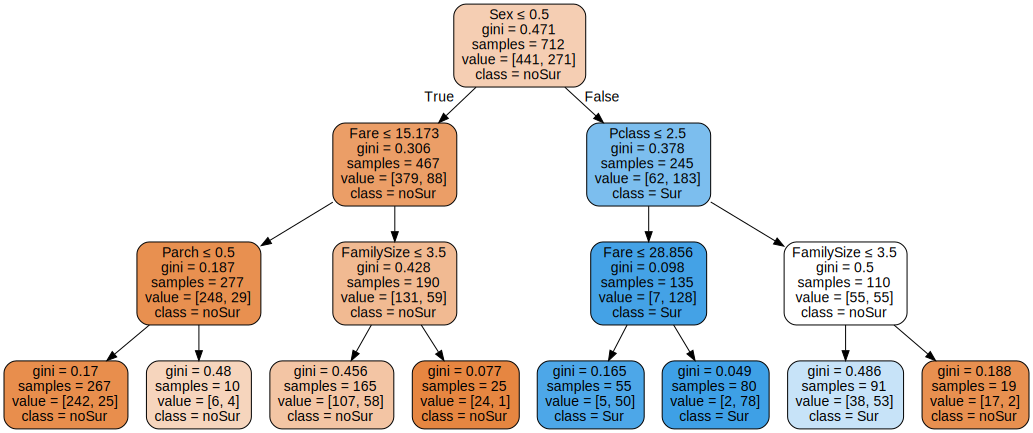

In [ ]:
# option 1 save decision tree as .pdf
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(model, out_file=None, feature_names=columns[1:], class_names=['noSur', 'Sur'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("Titanic")
graph